
# <span style="color:red; font-style:italic; text-decoration:underline;"> Partie I : Implémenter un réseau RNN pour l'analyse de sentiment à l'aide d'un ensemble de données au format CSV. </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

In [5]:
data = pd.read_csv('data/IMDB Dataset.csv')
data.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [4]:
l =  list(data.review)
for i in range(len(l)) :
    x = l[i].replace('<br />','')
    l[i= x.replace('<br />','')
    

### <span style="color:green; font-style:italic; text-decoration:underline;"> 2) - Chargement et Exploration du Jeu de Données  </span>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
positive_count = data['sentiment'].value_counts()['positive']
negative_count = data['sentiment'].value_counts()['negative']

print(f"Number of positive reviews: {positive_count}")
print(f"Number of negative reviews: {negative_count}")


Number of positive reviews: 25000
Number of negative reviews: 25000


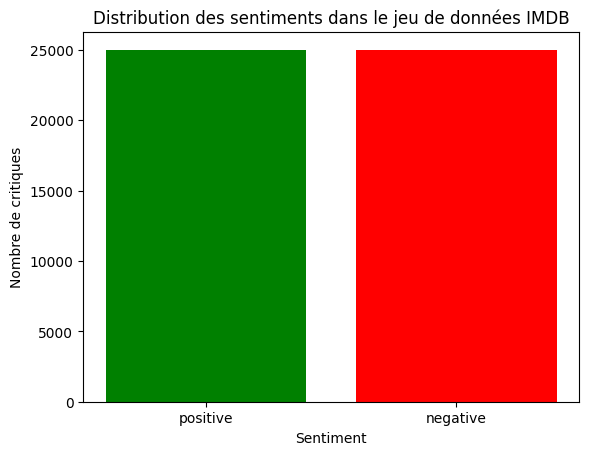

In [6]:
# Compter le nombre de sentiments positifs et négatifs
sentiment_counts = data['sentiment'].value_counts()

# Tracer le diagramme à barres
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Nombre de critiques')
plt.title('Distribution des sentiments dans le jeu de données IMDB')
plt.show()


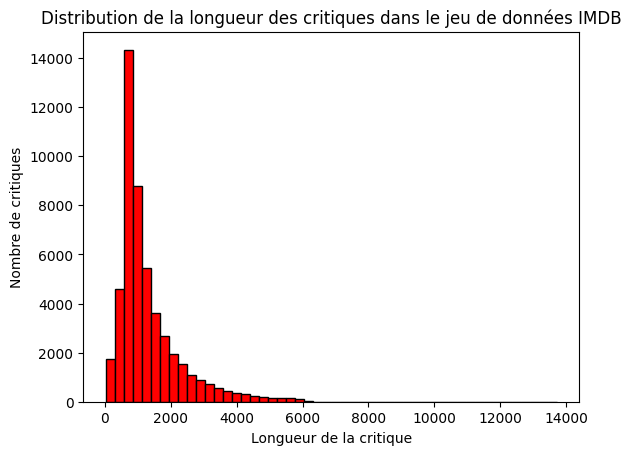

In [9]:
# Ajouter une colonne pour la longueur des critiques
data['review_length'] = data['review'].apply(len)

# Tracer l'histogramme
plt.hist(data['review_length'], bins=50, color='red', edgecolor='black')
plt.xlabel('Longueur de la critique')
plt.ylabel('Nombre de critiques')
plt.title('Distribution de la longueur des critiques dans le jeu de données IMDB')
plt.show()


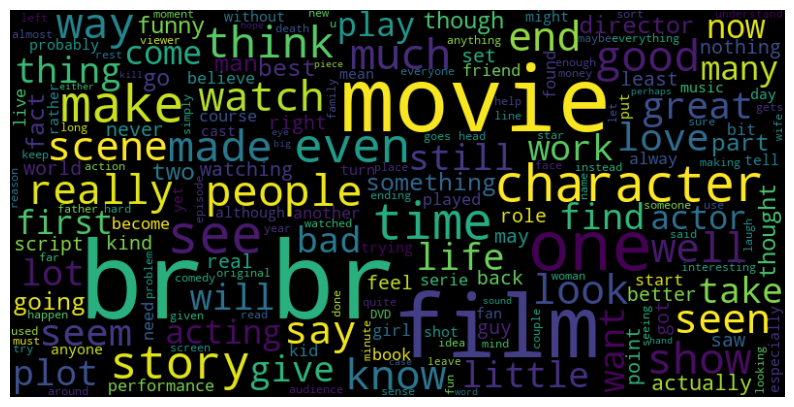

In [10]:
from wordcloud import WordCloud
texte_complet = ' '.join(data['review'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(texte_complet)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### <span style="color:green; font-style:italic; text-decoration:underline;"> 3) - Pre-processing  </span>

> #### <span style="color:blue; font-style:italic; text-decoration:underline;"> a)- Nettoyer et prétraiter les textes</span>

In [3]:
import re
from string import punctuation

def nettoyer_texte(texte):
    texte = texte.lower()
    texte = ''.join([caractere for caractere in texte if caractere not in punctuation])
    # Supprimer les balises HTML
    texte = re.sub('<.*?>', '', texte)
    return texte

In [4]:
data['review'] = data['review'].apply(nettoyer_texte)

> #### <span style="color:blue; font-style:italic; text-decoration:underline;"> b) - Encodage</span>

In [5]:
data['sentiment_code'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

> #### <span style="color:blue; font-style:italic; text-decoration:underline;">c) - Tokenisation des textes </span>

In [6]:
# Tokeniser les textes
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

> #### <span style="color:blue; font-style:italic; text-decoration:underline;"> d) - convertion chaque critique textuelle en une séquence numérique  </span>

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#longueur de séquence nominale de 200
max_length = 200
# Tronquer et compléter les séquences numériques
X = pad_sequences(sequences, maxlen=max_length, padding='post')

In [8]:
exemple_texte = data['review'][0]
exemple_sequence = X[0]
print(f"Exemple de texte original :\n{exemple_texte}\n")
print(f"Exemple de séquence numérique correspondante :\n{exemple_sequence}")

Exemple de texte original :
one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where 

> ## <span style="color:green; font-style:italic; text-decoration:underline;"> 4) - Construction du Modèle RNN basique </span>

In [8]:
y = data['sentiment_code']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Taille de l\'ensemble d\'entraînement : {len(x_train)}')
print(f'Taille de l\'ensemble de test : {len(x_test)}')

Taille de l'ensemble d'entraînement : 40000
Taille de l'ensemble de test : 10000


In [9]:
# Créer le modèle RNN basique
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## <span style="color:green; font-style:italic; text-decoration:underline;"> 5) - Compilation et Entraînement du Modèle </span>

Epoch 1/10
313/313 [==============================] - 15s 44ms/step - loss: 0.6819 - accuracy: 0.5416 - val_loss: 0.6708 - val_accuracy: 0.5558
Epoch 2/10
313/313 [==============================] - 14s 43ms/step - loss: 0.6333 - accuracy: 0.6187 - val_loss: 0.5955 - val_accuracy: 0.7111
Epoch 3/10
313/313 [==============================] - 23s 73ms/step - loss: 0.5555 - accuracy: 0.7176 - val_loss: 0.6772 - val_accuracy: 0.5598
Epoch 4/10
313/313 [==============================] - 17s 55ms/step - loss: 0.5367 - accuracy: 0.7081 - val_loss: 0.5674 - val_accuracy: 0.7252
Epoch 5/10
313/313 [==============================] - 14s 46ms/step - loss: 0.4665 - accuracy: 0.7596 - val_loss: 0.7837 - val_accuracy: 0.5567
Epoch 6/10
313/313 [==============================] - 14s 46ms/step - loss: 0.4582 - accuracy: 0.7280 - val_loss: 0.7629 - val_accuracy: 0.5673
Epoch 7/10
313/313 [==============================] - 13s 42ms/step - loss: 0.3931 - accuracy: 0.7733 - val_loss: 0.8245 - val_accuracy:

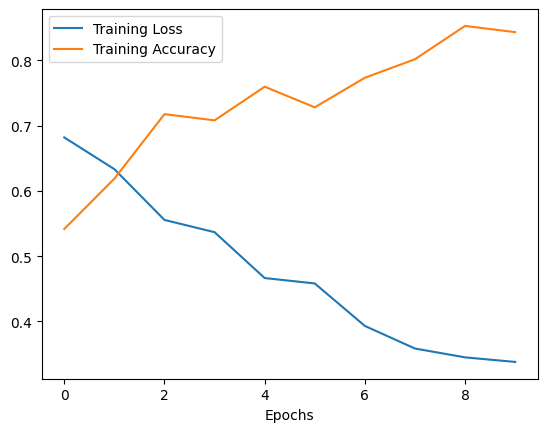

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

> ## <span style="color:green; font-style:italic; text-decoration:underline;"> 6) - Évaluation du Modèle </span>

313/313 [==============================] - 3s 9ms/step
Précision du modèle : 62.71%


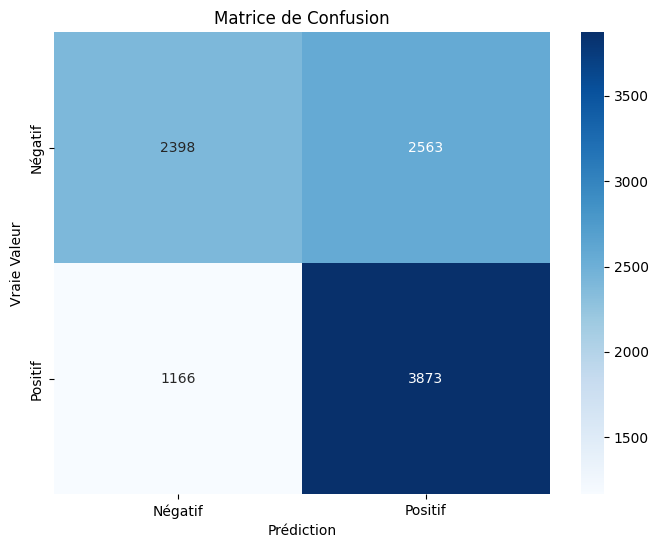

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.67      0.48      0.56      4961
           1       0.60      0.77      0.68      5039

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.62     10000
weighted avg       0.64      0.63      0.62     10000



In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int) 

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion')
plt.show()

# Afficher le rapport de classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred))

#### - Précision (Precision) :

    * Pour la classe 0 (négative), la précision est de 67%. Cela signifie que parmi toutes les prédictions faites par le modèle pour la classe 0, 67% sont correctes.
    * Pour la classe 1 (positive), la précision est de 60%. Cela signifie que parmi toutes les prédictions faites par le modèle pour la classe 1, 60% sont correctes.

#### - Rappel (Recall) :

    * Pour la classe 0, le rappel est de 48%. Cela signifie que parmi tous les exemples réels de la classe 0, le modèle en a correctement identifié 48%.
    * Pour la classe 1, le rappel est de 77%. Cela signifie que parmi tous les exemples réels de la classe 1, le modèle en a correctement identifié 77%.

#### - Score F1 :

    * Le score F1 est une mesure qui combine à la fois la précision et le rappel en un seul nombre. Il est calculé comme une moyenne pondérée des deux.
    * Pour la classe 0, le score F1 est de 56%.
    * Pour la classe 1, le score F1 est de 68%.

#### - Exactitude (Accuracy) :

    * L'exactitude globale du modèle est de 63%. Cela représente la proportion totale de prédictions correctes parmi toutes les prédictions.
    

> ## <span style="color:green; font-style:italic; text-decoration:underline;"> 7) - Analyse des Paramètres du Modèle </span>

> ### <span style="color:blue; font-style:italic; text-decoration:underline;"> a) - les principaux paramètres du modèle LSTM </span>

** Les principaux paramètres du modèle LSTM (Long Short-Term Memory) sont des hyperparamètres qui déterminent la structure et le comportement du modèle. Voici une explication de ces paramètres :*

> #####  units (nombre d'unités) :

C'est le nombre de neurones LSTM dans la couche LSTM. Chaque unité LSTM représente une cellule mémoire qui peut stocker et récupérer des informations sur une période de temps arbitraire. Un plus grand nombre d'unités permet au modèle de capturer des motifs plus complexes mais peut également augmenter la complexité du modèle.

> #####  embedding_dim (dimension d'incorporation) : 

Lorsque vous utilisez une couche d'embedding en tant que première couche du modèle, embedding_dim est la dimension de l'espace dans lequel les mots sont incorporés. Elle représente la taille des vecteurs d'incorporation pour chaque mot dans le vocabulaire. Plus la dimension d'incorporation est grande, plus le modèle peut apprendre des représentations riches pour les mots, mais cela peut également augmenter la complexité du modèle.

> #####    input_length (longueur d'entrée) :  

C'est la longueur des séquences en entrée. Dans le contexte du traitement du langage naturel (NLP), cela représente généralement le nombre de mots dans une séquence textuelle. La couche d'embedding attend des séquences d'entrée de cette longueur.

> #####  activation (fonction d'activation) : 

Il s'agit de la fonction d'activation utilisée dans la dernière couche du modèle. La dernière couche est généralement une couche dense qui génère les prédictions du modèle. La fonction d'activation spécifie comment les sorties de cette couche dense sont transformées avant d'être comparées aux étiquettes réelles. Pour un problème de classification binaire, la fonction d'activation couramment utilisée est "sigmoid", tandis que pour un problème de classification multiclasse, "softmax" est souvent utilisée.

> ### <span style="color:blue; font-style:italic; text-decoration:underline;"> b) - Modifiez le nombre d'unités dans le RNN </span>

>> ### <span style="color:brown; font-style:italic; text-decoration:underline;"> i) - Augmentation de nombre d'unités</span>

In [16]:
# Créer le modèle RNN basique
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=32, input_length=max_length))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642113 (2.45 MB)
Trainable params: 642113 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
313/313 [==============================] - 15s 43ms/step - loss: 0.6800 - accuracy: 0.5474 - val_loss: 0.6513 - val_accuracy: 0.6112
Epoch 2/10
313/313 [==============================] - 14s 45ms/step - loss: 0.6324 - accuracy: 0.6314 - val_loss: 0.6709 - val_accuracy: 0.5554
Epoch 3/10
313/313 [==============================] - 20s 63ms/step - loss: 0.5635 - accuracy: 0.6870 - val_loss: 0.6706 - val_accuracy: 0.5661
Epoch 4/10
313/313 [==============================] - 20s 64ms/step - loss: 0.5434 - accuracy: 0.6679 - val_loss: 0.7275 - val_accuracy: 0.5532
Epoch 5/10
313/313 [==============================] - 14s 45ms/step - loss: 0.4742 - accuracy: 0.7074 - val_loss: 0.7512 - val_accuracy: 0.5541
Epoch 6/10
313/313 [==============================] - 15s 47ms/step - loss: 0.4118 - accuracy: 0.7531 - val_loss: 0.9113 - val_accuracy: 0.5570
Epoch 7/10
313/313 [==============================] - 16s 50ms/step - loss: 0.3922 - accuracy: 0.7655 - val_loss: 0.8687 - val_accuracy:

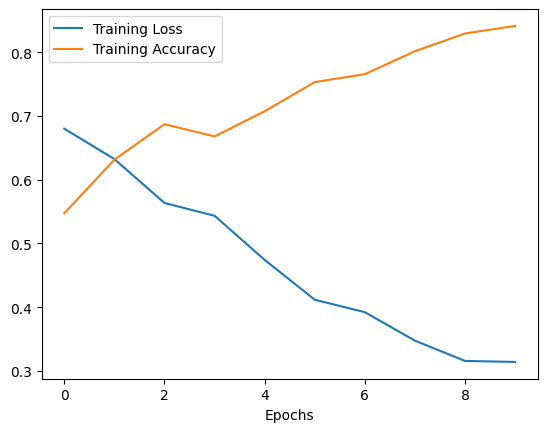

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

313/313 [==============================] - 3s 8ms/step
Précision du modèle : 55.46%


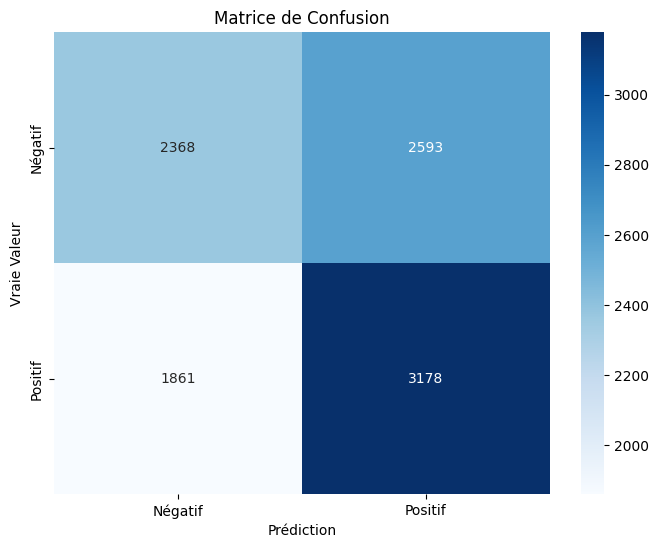

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.56      0.48      0.52      4961
           1       0.55      0.63      0.59      5039

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000



In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int) 

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion')
plt.show()

# Afficher le rapport de classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred))

> ## Modèle RNN avec 10 000 unités :
>> ### Précision (Precision) :

    - Pour la classe 0, la précision est de 67%, ce qui signifie que parmi toutes les prédictions de la classe 0, 67% sont correctes.
    - Pour la classe 1, la précision est de 60%, indiquant que parmi toutes les prédictions de la classe 1, 60% sont correctes.

>> ### Rappel (Recall) :

    - Pour la classe 0, le rappel est de 48%, ce qui signifie que le modèle a correctement identifié 48% de toutes les instances de la classe 0.
    - Pour la classe 1, le rappel est de 77%, indiquant que le modèle a correctement identifié 77% de toutes les instances de la classe 1.

>> ### F1-score :

    - Le F1-score est une moyenne pondérée de la précision et du rappel. Il est de 0.56 pour la classe 0 et de 0.68 pour la classe 1.

>> ### Exactitude (Accuracy) :

    - L'exactitude globale du modèle est de 63%, ce qui représente le pourcentage total de prédictions correctes.
    
> ## Modèle RNN avec 20 000 unités :

>> ### Précision :

    - Pour la classe 0, la précision est de 56%, ce qui signifie que parmi toutes les prédictions de la classe 0, 56% sont correctes.
    - Pour la classe 1, la précision est de 55%, indiquant que parmi toutes les prédictions de la classe 1, 55% sont correctes.

>> ### Rappel :

    - Pour la classe 0, le rappel est de 48%, et pour la classe 1, le rappel est de 63%.

>> ### F1-score :

    - Le F1-score est de 0.52 pour la classe 0 et de 0.59 pour la classe 1.

>> ### Exactitude :

    - L'exactitude globale du modèle est de 55%.

> ## Comparaison :
    - Le modèle RNN avec 10 000 unités semble avoir de meilleures performances globales, avec une précision plus élevée et un F1-score global plus élevé.
    - Cependant, le modèle RNN avec 20 000 unités a un rappel légèrement supérieur pour la classe 1.

> ## Conclusion :
augmenter le nombre d'unités n'est pas toujours efficace pour améliorer les performances du modèle

> ### <span style="color:blue; font-style:italic; text-decoration:underline;"> c) - Modifiez la finction d'activation dans le RNN </span>

> # <span style="color:red; font-style:italic; text-decoration:underline;"> Partie II : Implémenter un réseau RNN pour effectuer la tâche du Part Of Speech. </span>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN


>> ## <span style="color:green; font-style:italic; text-decoration:underline;"> 3) - Création d’un simple Jeu de Données  </span>

In [7]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords


# Function to tokenize and tag parts of speech
def tokenize_and_tag(sentence):
    tokens = word_tokenize(sentence)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove non-alphabetic characters
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    pos_tags = pos_tag(tokens)
    return tokens, pos_tags

# Create lists of sentences and parts of speech
sentences = []
pos_tags_list = []

for review in data['review']:
    tokens, pos_tags = tokenize_and_tag(review)
    sentences.append(tokens)
    pos_tags_list.append(pos_tags)

# Generate unique word and part-of-speech lists
word_list = list(set([word for sentence in sentences for word in sentence]))
pos_list = list(set([pos[1] for pos_tags in pos_tags_list for pos in pos_tags]))
pos_list

['VBZ',
 'CC',
 'PRP$',
 'VBD',
 'CD',
 'VBP',
 'JJS',
 'JJR',
 'VBG',
 'VBN',
 'SYM',
 'POS',
 'RBS',
 'WP$',
 'RP',
 'NNP',
 'WDT',
 'MD',
 'DT',
 'UH',
 'IN',
 '$',
 'VB',
 "''",
 'FW',
 'PRP',
 'NNS',
 '``',
 'WRB',
 'TO',
 'PDT',
 'RB',
 'EX',
 'WP',
 'RBR',
 'JJ',
 'NN',
 'NNPS']

In [30]:
word_list 

['koffee',
 'honoria',
 'searchin',
 'frecklefaced',
 'lagosi',
 'speakergravywhat',
 'veit',
 'shockless',
 'eylau',
 'unassuming',
 'slimebr',
 'stopsign',
 'writhe',
 'rouve',
 'fleshandblood',
 'hussar',
 'paradoxbr',
 'calismasam',
 'auditionbut',
 'vez',
 'demonkicking',
 'deranged',
 'moss',
 'oneills',
 'titsbr',
 'powerbroker',
 'develope',
 'reveresbr',
 'ermanno',
 'tummy',
 'sherpas',
 'secondhalf',
 'leolo',
 'necropole',
 'dayal',
 'budapestvienna',
 'stripping',
 'emerges',
 'motunfortunately',
 'preflight',
 'shakespearesbr',
 'punctual',
 'fukuky',
 'wringer',
 'wagoneven',
 'discountcloseout',
 'immovable',
 'pomaceous',
 'doc',
 'croatia',
 'pointsone',
 'horrorthe',
 'migrates',
 'shrank',
 'kitchener',
 'competitionin',
 'contempory',
 'punksters',
 'marti',
 'attemptsthis',
 'objections',
 'batter',
 'backwhich',
 'oilfield',
 'lovelovelove',
 'nd',
 'whartons',
 'intimidated',
 'salmonella',
 'cranham',
 'castthats',
 'trademarks',
 'insultbr',
 'lynes',
 'though

In [10]:
# Create mappings between words and indices
word2idx = {word: idx for idx, word in enumerate(word_list)}
idx2word = {idx: word for idx, word in enumerate(word_list)}

# Create mappings between parts of speech and indices
pos2idx = {pos: idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx: pos for idx, pos in enumerate(pos_list)}


In [37]:
print("Number of sentences:", len(sentences))
print("Number of unique words:", len(word_list))
print("Number of unique parts of speech:", len(pos_list))
print("\nExample word to index mapping:")
word2idx

Number of sentences: 50000
Number of unique words: 174945
Number of unique parts of speech: 38

Example word to index mapping:


{'koffee': 0,
 'honoria': 1,
 'searchin': 2,
 'frecklefaced': 3,
 'lagosi': 4,
 'speakergravywhat': 5,
 'veit': 6,
 'shockless': 7,
 'eylau': 8,
 'unassuming': 9,
 'slimebr': 10,
 'stopsign': 11,
 'writhe': 12,
 'rouve': 13,
 'fleshandblood': 14,
 'hussar': 15,
 'paradoxbr': 16,
 'calismasam': 17,
 'auditionbut': 18,
 'vez': 19,
 'demonkicking': 20,
 'deranged': 21,
 'moss': 22,
 'oneills': 23,
 'titsbr': 24,
 'powerbroker': 25,
 'develope': 26,
 'reveresbr': 27,
 'ermanno': 28,
 'tummy': 29,
 'sherpas': 30,
 'secondhalf': 31,
 'leolo': 32,
 'necropole': 33,
 'dayal': 34,
 'budapestvienna': 35,
 'stripping': 36,
 'emerges': 37,
 'motunfortunately': 38,
 'preflight': 39,
 'shakespearesbr': 40,
 'punctual': 41,
 'fukuky': 42,
 'wringer': 43,
 'wagoneven': 44,
 'discountcloseout': 45,
 'immovable': 46,
 'pomaceous': 47,
 'doc': 48,
 'croatia': 49,
 'pointsone': 50,
 'horrorthe': 51,
 'migrates': 52,
 'shrank': 53,
 'kitchener': 54,
 'competitionin': 55,
 'contempory': 56,
 'punksters': 57

In [39]:
idx2word 

{0: 'koffee',
 1: 'honoria',
 2: 'searchin',
 3: 'frecklefaced',
 4: 'lagosi',
 5: 'speakergravywhat',
 6: 'veit',
 7: 'shockless',
 8: 'eylau',
 9: 'unassuming',
 10: 'slimebr',
 11: 'stopsign',
 12: 'writhe',
 13: 'rouve',
 14: 'fleshandblood',
 15: 'hussar',
 16: 'paradoxbr',
 17: 'calismasam',
 18: 'auditionbut',
 19: 'vez',
 20: 'demonkicking',
 21: 'deranged',
 22: 'moss',
 23: 'oneills',
 24: 'titsbr',
 25: 'powerbroker',
 26: 'develope',
 27: 'reveresbr',
 28: 'ermanno',
 29: 'tummy',
 30: 'sherpas',
 31: 'secondhalf',
 32: 'leolo',
 33: 'necropole',
 34: 'dayal',
 35: 'budapestvienna',
 36: 'stripping',
 37: 'emerges',
 38: 'motunfortunately',
 39: 'preflight',
 40: 'shakespearesbr',
 41: 'punctual',
 42: 'fukuky',
 43: 'wringer',
 44: 'wagoneven',
 45: 'discountcloseout',
 46: 'immovable',
 47: 'pomaceous',
 48: 'doc',
 49: 'croatia',
 50: 'pointsone',
 51: 'horrorthe',
 52: 'migrates',
 53: 'shrank',
 54: 'kitchener',
 55: 'competitionin',
 56: 'contempory',
 57: 'punksters'

In [11]:
import pickle

try:
    # Save the mappings and lists to a file
    with open('data/word2idx.pkl', 'wb') as f:
        pickle.dump(word2idx, f)
    
    # Save the mappings and lists to a file
    with open('data/sentences.pkl', 'wb') as f:
        pickle.dump(word2idx, f)

    with open('data/pos_list.pkl', 'wb') as f:
        pickle.dump(pos_list, f)

    with open('data/word_list.pkl', 'wb') as f:
        pickle.dump(word_list, f)

    with open('data/idx2word.pkl', 'wb') as f:
        pickle.dump(idx2word, f)
except : pass 

# Load the mappings and lists from the file
with open('data/word2idx.pkl', 'rb') as f:
    loaded_word2idx = pickle.load(f)
with open('data/sentences.pkl', 'rb') as f:
    loaded_word2idx = pickle.load(f)

with open('data/pos_list.pkl', 'rb') as f:
    loaded_pos_list = pickle.load(f)

with open('data/word_list.pkl', 'rb') as f:
    loaded_word_list = pickle.load(f)

with open('data/idx2word.pkl', 'rb') as f:
    loaded_idx2word = pickle.load(f)


>> ### <span style="color:green; font-style:italic; text-decoration:underline;"> 2) - Pre-processing  </span>

In [12]:
# Function to convert sentences and parts of speech to sequences of indices
def convert_to_indices(sentence, pos_tags, word2idx, pos2idx):
    sentence_indices = [word2idx[word] for word in sentence]
    pos_indices = [pos2idx[pos[1]] for pos in pos_tags]
    return sentence_indices, pos_indices

# Convert sentences and parts of speech to sequences of indices
sequences = []
pos_sequences = []

for i in range(len(sentences)):
    sentence_indices, pos_indices = convert_to_indices(sentences[i], pos_tags_list[i], word2idx, pos2idx)
    sequences.append(sentence_indices)
    pos_sequences.append(pos_indices)

# Pad sequences to have a uniform length
max_length = 100  # Set your desired maximum length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
padded_pos_sequences = pad_sequences(pos_sequences, maxlen=max_length, padding='post', truncating='post')


In [51]:
print("Exemple de séquence de phrases :")
padded_sequences[0]


Example sentence sequence:


array([ 47607, 167871,  73871, 117027, 143296,  84921, 153533,  35106,
        19082,  24582, 117833,  98615,  61910, 172749,   8658,  51707,
       143296,  40933,  48625,  61295, 137746, 168610,  19082, 134828,
        19870,  81311, 106600,  38653, 121444,  65474, 106600, 157796,
       165343, 123827,  22720, 152104, 137746,  50719,  44032, 140964,
         2527,  61910,  57569, 143296, 101477,  19771,  38068,  43335,
        34502,  88876,  14670, 116542, 122442, 156445,  56088, 114487,
        69647,  97593,  95082,  74683,  15079,  21753,  67690, 165493,
        11515,  27708,  73478,  56088,  74369, 159761, 152754,  46874,
        41602, 143990,  11292,  19710, 140829,  66834, 127074,  98401,
        30254,  48874,  22039, 140592,  55579, 116790, 155382,  61910,
        84102,  85629, 171829, 142059, 106600,  30382,  19542, 139794,
       154832,  13011, 150942,  12338])

In [52]:
print("RNN pour effectuer la tâche Part Of Speech.")
padded_pos_sequences[0]


Example part-of-speech sequence:


array([12, 11, 10,  0,  2, 17, 17, 10, 24, 24,  3, 17, 17,  2, 17, 10,  2,
       17,  0, 11, 17,  3, 24, 17, 23, 17, 17, 17, 10,  2, 17,  6, 11, 11,
       11, 17, 17, 17,  2, 17, 17, 17,  3, 17, 17,  3,  2,  2, 17, 17,  2,
       11, 24, 28, 17,  2, 17, 17, 11, 17, 11, 28, 11, 28,  2, 17, 28, 17,
       17, 11, 28, 11, 11, 11, 11,  2, 17, 11, 17, 11, 28, 11,  2, 11, 24,
       24,  2, 17, 18, 23,  2, 17, 17,  2, 17,  6,  6, 17, 17, 23])

>> ### <span style="color:green; font-style:italic; text-decoration:underline;"> 3) - Construction du Modèle RNN basique   </span>

In [13]:

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Define the model
model = Sequential()

# Add Embedding layer
model.add(Embedding(input_dim=len(word2idx), output_dim=32, input_length=max_length))

# Add SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(10, activation='relu', return_sequences=True))

# Add Dense layer for each time step in the sequence
model.add(Dense(len(pos2idx), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           3100192   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 10)           430       
                                                                 
 dense (Dense)               (None, 100, 38)           418       
                                                                 
Total params: 3101040 (11.83 MB)
Trainable params: 3101040 (11.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <span style="color:green; font-style:italic; text-decoration:underline;"> 4) - Compilation et Entraînement du Modèle  </span>

In [17]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, padded_pos_sequences, test_size=0.2, random_state=42)

Epoch 1/7
1250/1250 [==============================] - 64s 51ms/step - loss: 1.0490 - accuracy: 0.7053 - val_loss: 0.4446 - val_accuracy: 0.8667
Epoch 2/7
1250/1250 [==============================] - 52s 42ms/step - loss: 0.3849 - accuracy: 0.8786 - val_loss: 0.3768 - val_accuracy: 0.8792
Epoch 3/7
1250/1250 [==============================] - 56s 44ms/step - loss: 0.3369 - accuracy: 0.8889 - val_loss: 0.3615 - val_accuracy: 0.8823
Epoch 4/7
1250/1250 [==============================] - 57s 45ms/step - loss: 0.3176 - accuracy: 0.8932 - val_loss: 0.3559 - val_accuracy: 0.8831
Epoch 5/7
1250/1250 [==============================] - 57s 46ms/step - loss: 0.3066 - accuracy: 0.8957 - val_loss: 0.3542 - val_accuracy: 0.8837
Epoch 6/7
1250/1250 [==============================] - 55s 44ms/step - loss: 0.2992 - accuracy: 0.8974 - val_loss: 0.3541 - val_accuracy: 0.8840
Epoch 7/7
1250/1250 [==============================] - 54s 43ms/step - loss: 0.2936 - accuracy: 0.8988 - val_loss: 0.3541 - val_ac

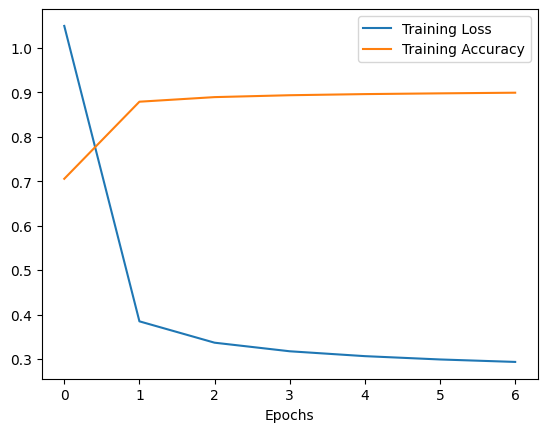

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 7 
history = model.fit(padded_sequences, padded_pos_sequences, epochs=epochs, batch_size=32, validation_split=0.2)

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [21]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)
